# Explore the Wine Dataset

In [4]:
import pandas as pd

read the red wine data
display the varibles

In [18]:
redWine = pd.read_csv('wineQualityData/winequality-red.csv',sep=';')
redWine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


display the number of observations

In [15]:
redWine.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [19]:
whiteWine = pd.read_csv('wineQualityData/winequality-white.csv',sep=';')
whiteWine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [20]:
whiteWine.count()

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64

So as you can see both datas have 11 variables and one output which is quality

I will work on the red data for now because it has less data, I don't want to make my computer tired of computations in ht elearning stage.

After I get familiar with the operations I will use the white wine data because more data means better training.

Let's check the general statistical information about out data

In [21]:
redWine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


The mean of the quality is 5.6, as it's suggested I will define
    the wine with quality score that is below 5.6 as badWine
    and the wine with quality score that is above 5.6 as goodWine

First I'll seperate the data into training and test data sets.
70% for training, 30% for testing

In [22]:
from sklearn.model_selection import train_test_split

redWineTrain, redWineTest = \
train_test_split(redWine, test_size=0.3, random_state=0)

In [23]:
redWineTrain.count()

fixed acidity           1119
volatile acidity        1119
citric acid             1119
residual sugar          1119
chlorides               1119
free sulfur dioxide     1119
total sulfur dioxide    1119
density                 1119
pH                      1119
sulphates               1119
alcohol                 1119
quality                 1119
dtype: int64

In [24]:
redWineTest.count()

fixed acidity           480
volatile acidity        480
citric acid             480
residual sugar          480
chlorides               480
free sulfur dioxide     480
total sulfur dioxide    480
density                 480
pH                      480
sulphates               480
alcohol                 480
quality                 480
dtype: int64

Now I want to seperate the quality from other variables.

In [52]:
redWineQualityTrain = (redWineTrain['quality'].values)
redWineVariablesTrain = redWineTrain.iloc[:,0:-1].values

redWineVariablesTrain.shape

(1119L, 11L)

I want to extract a specific column from the data

In [56]:
def column(matrix, i):
    return [row[i] for row in matrix]

The following linrary will help me to get the main statistical information about an array

In [59]:
from scipy import stats

fixedAcidity = column(redWineVariablesTrain, 0)
stats.describe(fixedAcidity)

DescribeResult(nobs=1119L, minmax=(4.7000000000000002, 15.9), mean=8.340661304736372, variance=3.0343469683671689, skewness=0.9697935459761903, kurtosis=1.075004834979187)

And just out of curiosity I'll plot a few variables and see how they change versus the quality.

In [42]:
import numpy as np

trainingDataLengthArray = np.arange(0, len(redWineQualityTrain))
trainingDataLengthArray

array([   0,    1,    2, ..., 1116, 1117, 1118])

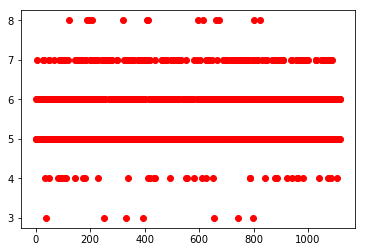

In [47]:
import matplotlib.pyplot as plt

plt.plot(trainingDataLengthArray, redWineQualityTrain, 'ro')
plt.show()

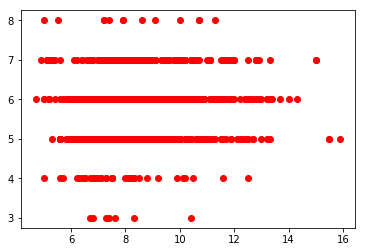

In [60]:
plt.plot(fixedAcidity, redWineQualityTrain, 'ro')
plt.show()

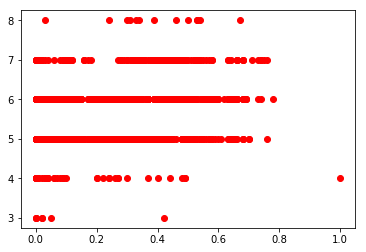

In [62]:
citricAcid = column(redWineVariablesTrain, 2)
plt.plot(citricAcid, redWineQualityTrain, 'ro')
plt.show()

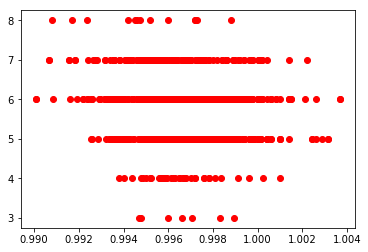

In [70]:
plt.plot(column(redWineVariablesTrain, 7), redWineQualityTrain, 'ro')
plt.show()

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\pyplot.py:3316: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


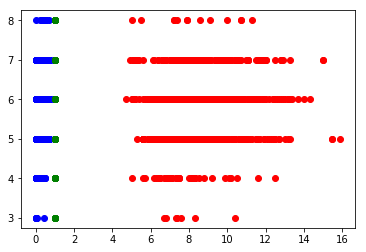

In [71]:
plt.plot(fixedAcidity, redWineQualityTrain, 'ro', hold=True)
plt.plot(citricAcid, redWineQualityTrain, 'bo', hold=True)
plt.plot(column(redWineVariablesTrain, 7), redWineQualityTrain, 'go')
plt.show()

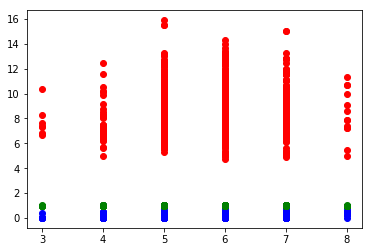

In [72]:
plt.plot(redWineQualityTrain, fixedAcidity, 'ro', hold=True)
plt.plot(redWineQualityTrain, citricAcid, 'bo', hold=True)
plt.plot(redWineQualityTrain, column(redWineVariablesTrain, 7), 'go')
plt.show()